## Initially I opted to go with Option B:
- Transform the json profiles into a csv or dataframe and provide exploratory analysis of the dataset.
- Summarise and explain the key trends in the data, providing visualisations and tabular representations as necessary.
- Explain what factors you think are significant and insignificant in contributing to fraud

In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
pd.set_option('max_colwidth', 300)
pd.set_option('display.max_columns', 50)
with open('customers.json') as json_file:
    df = pd.read_json(json_file, lines=True)

In [3]:
df['fraudulent'].describe()
# 107 False & 61 True fraudulent customers

count       168
unique        2
top       False
freq        107
Name: fraudulent, dtype: object

In [4]:
df.head(3)

,customer,fraudulent,orders,paymentMethods,transactions
0,"{'customerEmail': 'josephhoward@yahoo.com', 'customerPhone': '400-108-5415', 'customerDevice': 'yyeiaxpltf82440jnb3v', 'customerIPAddress': '8.129.104.40', 'customerBillingAddress': '5493 Jones Islands Brownside, CA 51896'}",False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'orderState': 'pending', 'orderShippingAddress': '5493 Jones Islands Brownside, CA 51896'}, {'orderId': 'yp6x27', 'orderAmount': 26, 'orderState': 'fulfilled', 'orderShippingAddress': '5493 Jones Islands Brownside, CA 51896'}]","[{'paymentMethodId': 'wt07xm68b', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'card', 'paymentMethodProvider': 'JCB 16 digit', 'paymentMethodIssuer': 'Citizens First Banks'}]","[{'transactionId': 'a9lcj51r', 'orderId': 'vjbdvd', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 18, 'transactionFailed': False}, {'transactionId': 'y4wcv03i', 'orderId': 'yp6x27', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 26, 'transactionFailed': False}]"
1,"{'customerEmail': 'evansjeffery@yahoo.com', 'customerPhone': '1-788-091-7546', 'customerDevice': 'r0jpm7xaeqqa3kr6mzum', 'customerIPAddress': '219.173.211.202', 'customerBillingAddress': '356 Elizabeth Inlet Suite 120 Port Joshuabury, NM 37681'}",True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'orderState': 'fulfilled', 'orderShippingAddress': '898 Henry Ports New Keithview, CA 95893-2497'}, {'orderId': 'uw0eeb', 'orderAmount': 23, 'orderState': 'fulfilled', 'orderShippingAddress': '356 Elizabeth Inlet Suite 120 Port Joshuabury, NM 37681'}, {'...","[{'paymentMethodId': 'y3xp697jx', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'bitcoin', 'paymentMethodProvider': 'VISA 16 digit', 'paymentMethodIssuer': 'Solace Banks'}, {'paymentMethodId': '6krszxc05', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', '...","[{'transactionId': '5mi94sfw', 'orderId': 'nlghpa', 'paymentMethodId': '41ug157xz', 'transactionAmount': 45, 'transactionFailed': False}, {'transactionId': 'br8ba1nu', 'orderId': 'uw0eeb', 'paymentMethodId': '41ug157xz', 'transactionAmount': 23, 'transactionFailed': False}, {'transactionId': 'a3..."
2,"{'customerEmail': 'andersonwilliam@yahoo.com', 'customerPhone': '024.420.0375', 'customerDevice': '4m7h5ipl1shyavt6vv2r', 'customerIPAddress': '67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0', 'customerBillingAddress': '8478 Sean Ridges Apt. 441 Davisberg, PR 72250'}",False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'orderState': 'failed', 'orderShippingAddress': '8478 Sean Ridges Apt. 441 Davisberg, PR 72250'}, {'orderId': '28v6b0', 'orderAmount': 24, 'orderState': 'fulfilled', 'orderShippingAddress': '8478 Sean Ridges Apt. 441 Davisberg, PR 72250'}, {'orderId': 'i...","[{'paymentMethodId': '8pneoi03z', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'JCB 16 digit', 'paymentMethodIssuer': 'Bastion Banks'}, {'paymentMethodId': 'dluy3jka0', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'pa...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk34y2', 'paymentMethodId': '8pneoi03z', 'transactionAmount': 33, 'transactionFailed': False}, {'transactionId': '3alf9irw', 'orderId': '28v6b0', 'paymentMethodId': '8pneoi03z', 'transactionAmount': 24, 'transactionFailed': True}, {'transactionId': '69w..."


In [34]:
df2 = pd.concat([df.drop(['orders'], axis=1), df['orders'].apply(pd.Series)], axis=1)
df2.head(3)

,customer,fraudulent,paymentMethods,transactions,0,1,2,3,4,5,6,7
0,"{'customerEmail': 'josephhoward@yahoo.com', 'customerPhone': '400-108-5415', 'customerDevice': 'yyeiaxpltf82440jnb3v', 'customerIPAddress': '8.129.104.40', 'customerBillingAddress': '5493 Jones Islands Brownside, CA 51896'}",False,"[{'paymentMethodId': 'wt07xm68b', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'card', 'paymentMethodProvider': 'JCB 16 digit', 'paymentMethodIssuer': 'Citizens First Banks'}]","[{'transactionId': 'a9lcj51r', 'orderId': 'vjbdvd', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 18, 'transactionFailed': False}, {'transactionId': 'y4wcv03i', 'orderId': 'yp6x27', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 26, 'transactionFailed': False}]","{'orderId': 'vjbdvd', 'orderAmount': 18, 'orderState': 'pending', 'orderShippingAddress': '5493 Jones Islands Brownside, CA 51896'}","{'orderId': 'yp6x27', 'orderAmount': 26, 'orderState': 'fulfilled', 'orderShippingAddress': '5493 Jones Islands Brownside, CA 51896'}",NaN,NaN,NaN,NaN,NaN,NaN
1,"{'customerEmail': 'evansjeffery@yahoo.com', 'customerPhone': '1-788-091-7546', 'customerDevice': 'r0jpm7xaeqqa3kr6mzum', 'customerIPAddress': '219.173.211.202', 'customerBillingAddress': '356 Elizabeth Inlet Suite 120 Port Joshuabury, NM 37681'}",True,"[{'paymentMethodId': 'y3xp697jx', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'bitcoin', 'paymentMethodProvider': 'VISA 16 digit', 'paymentMethodIssuer': 'Solace Banks'}, {'paymentMethodId': '6krszxc05', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', '...","[{'transactionId': '5mi94sfw', 'orderId': 'nlghpa', 'paymentMethodId': '41ug157xz', 'transactionAmount': 45, 'transactionFailed': False}, {'transactionId': 'br8ba1nu', 'orderId': 'uw0eeb', 'paymentMethodId': '41ug157xz', 'transactionAmount': 23, 'transactionFailed': False}, {'transactionId': 'a3...","{'orderId': 'nlghpa', 'orderAmount': 45, 'orderState': 'fulfilled', 'orderShippingAddress': '898 Henry Ports New Keithview, CA 95893-2497'}","{'orderId': 'uw0eeb', 'orderAmount': 23, 'orderState': 'fulfilled', 'orderShippingAddress': '356 Elizabeth Inlet Suite 120 Port Joshuabury, NM 37681'}","{'orderId': 'bn44oh', 'orderAmount': 43, 'orderState': 'fulfilled', 'orderShippingAddress': '5093 Bryan Forks Joshuaton, FM 01565-9801'}",NaN,NaN,NaN,NaN,NaN
2,"{'customerEmail': 'andersonwilliam@yahoo.com', 'customerPhone': '024.420.0375', 'customerDevice': '4m7h5ipl1shyavt6vv2r', 'customerIPAddress': '67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0', 'customerBillingAddress': '8478 Sean Ridges Apt. 441 Davisberg, PR 72250'}",False,"[{'paymentMethodId': '8pneoi03z', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'JCB 16 digit', 'paymentMethodIssuer': 'Bastion Banks'}, {'paymentMethodId': 'dluy3jka0', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'pa...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk34y2', 'paymentMethodId': '8pneoi03z', 'transactionAmount': 33, 'transactionFailed': False}, {'transactionId': '3alf9irw', 'orderId': '28v6b0', 'paymentMethodId': '8pneoi03z', 'transactionAmount': 24, 'transactionFailed': True}, {'transactionId': '69w...","{'orderId': 'yk34y2', 'orderAmount': 33, 'orderState': 'failed', 'orderShippingAddress': '8478 Sean Ridges Apt. 441 Davisberg, PR 72250'}","{'orderId': '28v6b0', 'orderAmount': 24, 'orderState': 'fulfilled', 'orderShippingAddress': '8478 Sean Ridges Apt. 441 Davisberg, PR 72250'}","{'orderId': 'itnk8y', 'orderAmount': 25, 'orderState': 'fulfilled', 'orderShippingAddress': '22396 Victor Lights Carsonstad, MO 93914'}",NaN,NaN,NaN,NaN,NaN


In [35]:
df3 = pd.concat([df2.drop(['transactions'], axis=1), df2['transactions'].apply(pd.Series)], axis=1)
df3.head(3)

,customer,fraudulent,paymentMethods,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"{'customerEmail': 'josephhoward@yahoo.com', 'customerPhone': '400-108-5415', 'customerDevice': 'yyeiaxpltf82440jnb3v', 'customerIPAddress': '8.129.104.40', 'customerBillingAddress': '5493 Jones Islands Brownside, CA 51896'}",False,"[{'paymentMethodId': 'wt07xm68b', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'card', 'paymentMethodProvider': 'JCB 16 digit', 'paymentMethodIssuer': 'Citizens First Banks'}]","{'orderId': 'vjbdvd', 'orderAmount': 18, 'orderState': 'pending', 'orderShippingAddress': '5493 Jones Islands Brownside, CA 51896'}","{'orderId': 'yp6x27', 'orderAmount': 26, 'orderState': 'fulfilled', 'orderShippingAddress': '5493 Jones Islands Brownside, CA 51896'}",NaN,NaN,NaN,NaN,NaN,NaN,"{'transactionId': 'a9lcj51r', 'orderId': 'vjbdvd', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 18, 'transactionFailed': False}","{'transactionId': 'y4wcv03i', 'orderId': 'yp6x27', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 26, 'transactionFailed': False}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'customerEmail': 'evansjeffery@yahoo.com', 'customerPhone': '1-788-091-7546', 'customerDevice': 'r0jpm7xaeqqa3kr6mzum', 'customerIPAddress': '219.173.211.202', 'customerBillingAddress': '356 Elizabeth Inlet Suite 120 Port Joshuabury, NM 37681'}",True,"[{'paymentMethodId': 'y3xp697jx', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'bitcoin', 'paymentMethodProvider': 'VISA 16 digit', 'paymentMethodIssuer': 'Solace Banks'}, {'paymentMethodId': '6krszxc05', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', '...","{'orderId': 'nlghpa', 'orderAmount': 45, 'orderState': 'fulfilled', 'orderShippingAddress': '898 Henry Ports New Keithview, CA 95893-2497'}","{'orderId': 'uw0eeb', 'orderAmount': 23, 'orderState': 'fulfilled', 'orderShippingAddress': '356 Elizabeth Inlet Suite 120 Port Joshuabury, NM 37681'}","{'orderId': 'bn44oh', 'orderAmount': 43, 'orderState': 'fulfilled', 'orderShippingAddress': '5093 Bryan Forks Joshuaton, FM 01565-9801'}",NaN,NaN,NaN,NaN,NaN,"{'transactionId': '5mi94sfw', 'orderId': 'nlghpa', 'paymentMethodId': '41ug157xz', 'transactionAmount': 45, 'transactionFailed': False}","{'transactionId': 'br8ba1nu', 'orderId': 'uw0eeb', 'paymentMethodId': '41ug157xz', 'transactionAmount': 23, 'transactionFailed': False}","{'transactionId': 'a33145ss', 'orderId': 'bn44oh', 'paymentMethodId': 'y3xp697jx', 'transactionAmount': 43, 'transactionFailed': True}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'customerEmail': 'andersonwilliam@yahoo.com', 'customerPhone': '024.420.0375', 'customerDevice': '4m7h5ipl1shyavt6vv2r', 'customerIPAddress': '67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0', 'customerBillingAddress': '8478 Sean Ridges Apt. 441 Davisberg, PR 72250'}",False,"[{'paymentMethodId': '8pneoi03z', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'JCB 16 digit', 'paymentMethodIssuer': 'Bastion Banks'}, {'paymentMethodId': 'dluy3jka0', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'pa...","{'orderId': 'yk34y2', 'orderAmount': 33, 'orderState': 'failed', 'orderShippingAddress': '8478 Sean Ridges Apt. 441 Davisberg, PR 72250'}","{'orderId': '28v6b0', 'orderAmount': 24, 'orderState': 'fulfilled', 'orderShippingAddress': '8478 Sean Ridges Apt. 441 Davisberg, PR 72250'}","{'orderId': 'itnk8y', 'orderAmount': 25, 'orderState': 'fulfilled', 'orderShippingAddress': '22396 Victor Lights Carsonstad, MO 93914'}",NaN,NaN,NaN,NaN,NaN,"{'transactionId': 'q3lyvbza', 'orderId': 'yk34y2', 'paymentMethodId': '8pneoi03z', 'transactionAmount': 33, 'transactionFailed': False}","{'transactionId': '3alf9irw', 'orderId': '28v6b0', 'paymentMethodId': '8pneoi03z', 'transactionAmount': 24, 'transactionFailed': True}","{'transactionId': '69w9wymx', 'orderId': '28v6b0', 'paymentMethodId': '8pneoi03z', 'transactionAmou

In [36]:
df4 = pd.concat([df3.drop(['paymentMethods'], axis=1), df3['paymentMethods'].apply(pd.Series)], axis=1)
df4.head(3)

,customer,fraudulent,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"{'customerEmail': 'josephhoward@yahoo.com', 'customerPhone': '400-108-5415', 'customerDevice': 'yyeiaxpltf82440jnb3v', 'customerIPAddress': '8.129.104.40', 'customerBillingAddress': '5493 Jones Islands Brownside, CA 51896'}",False,"{'orderId': 'vjbdvd', 'orderAmount': 18, 'orderState': 'pending', 'orderShippingAddress': '5493 Jones Islands Brownside, CA 51896'}","{'orderId': 'yp6x27', 'orderAmount': 26, 'orderState': 'fulfilled', 'orderShippingAddress': '5493 Jones Islands Brownside, CA 51896'}",NaN,NaN,NaN,NaN,NaN,NaN,"{'transactionId': 'a9lcj51r', 'orderId': 'vjbdvd', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 18, 'transactionFailed': False}","{'transactionId': 'y4wcv03i', 'orderId': 'yp6x27', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 26, 'transactionFailed': False}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'paymentMethodId': 'wt07xm68b', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'card', 'paymentMethodProvider': 'JCB 16 digit', 'paymentMethodIssuer': 'Citizens First Banks'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'customerEmail': 'evansjeffery@yahoo.com', 'customerPhone': '1-788-091-7546', 'customerDevice': 'r0jpm7xaeqqa3kr6mzum', 'customerIPAddress': '219.173.211.202', 'customerBillingAddress': '356 Elizabeth Inlet Suite 120 Port Joshuabury, NM 37681'}",True,"{'orderId': 'nlghpa', 'orderAmount': 45, 'orderState': 'fulfilled', 'orderShippingAddress': '898 Henry Ports New Keithview, CA 95893-2497'}","{'orderId': 'uw0eeb', 'orderAmount': 23, 'orderState': 'fulfilled', 'orderShippingAddress': '356 Elizabeth Inlet Suite 120 Port Joshuabury, NM 37681'}","{'orderId': 'bn44oh', 'orderAmount': 43, 'orderState': 'fulfilled', 'orderShippingAddress': '5093 Bryan Forks Joshuaton, FM 01565-9801'}",NaN,NaN,NaN,NaN,NaN,"{'transactionId': '5mi94sfw', 'orderId': 'nlghpa', 'paymentMethodId': '41ug157xz', 'transactionAmount': 45, 'transactionFailed': False}","{'transactionId': 'br8ba1nu', 'orderId': 'uw0eeb', 'paymentMethodId': '41ug157xz', 'transactionAmount': 23, 'transactionFailed': False}","{'transactionId': 'a33145ss', 'orderId': 'bn44oh', 'paymentMethodId': 'y3xp697jx', 'transactionAmount': 43, 'transactionFailed': True}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'paymentMethodId': 'y3xp697jx', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'bitcoin', 'paymentMethodProvider': 'VISA 16 digit', 'paymentMethodIssuer': 'Solace Banks'}","{'paymentMethodId': '6krszxc05', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'VISA 16 digit', 'paymentMethodIssuer': 'Vertex Bancorp'}","{'paymentMethodId': '5z1szj2he', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'Diners Club / Carte Blanche', 'paymentMethodIssuer': 'His Majesty Bank Corp.'}","{'paymentMethodId': 'm52tx8e1s', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'Mastercard', 'paymentMethodIssuer': 'Vertex Bancorp'}","{'paymentMethodId': '41ug157xz', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'bitcoin', 'paymentMethodProvider': 'American Express', 'paymentMethodIssuer': 'Bastion Banks'}","{'paymentMethodId': '4dpg5sx2b', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'Maestro', 'paymentMethodIssuer': 'Her Majesty Trust'}","{'paymentMethodId': 'bcx9pa3wf', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'JCB 16 digit', 'paymentMethodIssuer': 'Fountain Financial Inc.'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'customerEmail': 'andersonwilliam@yahoo.com', 'customerPhone': '024.420.0375', 'customerDevice': '4m7h5ipl1shyavt6vv2r', 'customerIPAddress': '67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0', 'customerBillingAddress': '8478 Sean 

In [37]:
df4.columns = ['customer','fraudulent','order1','order2','order3','order4','order5','order6','order7','order8','transaction1','transaction2','transaction3','transaction4','transaction5','transaction6','transaction7','transaction8','transaction9','transaction10','transaction11','transaction12','transaction13','transaction14','transaction15','paymentmethod1','paymentmethod2','paymentmethod3','paymentmethod4','paymentmethod5','paymentmethod6','paymentmethod7','paymentmethod8','paymentmethod9','paymentmethod10','paymentmethod11','paymentmethod12','paymentmethod13','paymentmethod14','paymentmethod15']
df4.head(3)

,customer,fraudulent,order1,order2,order3,order4,order5,order6,order7,order8,transaction1,transaction2,transaction3,transaction4,transaction5,transaction6,transaction7,transaction8,transaction9,transaction10,transaction11,transaction12,transaction13,transaction14,transaction15,paymentmethod1,paymentmethod2,paymentmethod3,paymentmethod4,paymentmethod5,paymentmethod6,paymentmethod7,paymentmethod8,paymentmethod9,paymentmethod10,paymentmethod11,paymentmethod12,paymentmethod13,paymentmethod14,paymentmethod15
0,"{'customerEmail': 'josephhoward@yahoo.com', 'customerPhone': '400-108-5415', 'customerDevice': 'yyeiaxpltf82440jnb3v', 'customerIPAddress': '8.129.104.40', 'customerBillingAddress': '5493 Jones Islands Brownside, CA 51896'}",False,"{'orderId': 'vjbdvd', 'orderAmount': 18, 'orderState': 'pending', 'orderShippingAddress': '5493 Jones Islands Brownside, CA 51896'}","{'orderId': 'yp6x27', 'orderAmount': 26, 'orderState': 'fulfilled', 'orderShippingAddress': '5493 Jones Islands Brownside, CA 51896'}",NaN,NaN,NaN,NaN,NaN,NaN,"{'transactionId': 'a9lcj51r', 'orderId': 'vjbdvd', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 18, 'transactionFailed': False}","{'transactionId': 'y4wcv03i', 'orderId': 'yp6x27', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 26, 'transactionFailed': False}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'paymentMethodId': 'wt07xm68b', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'card', 'paymentMethodProvider': 'JCB 16 digit', 'paymentMethodIssuer': 'Citizens First Banks'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'customerEmail': 'evansjeffery@yahoo.com', 'customerPhone': '1-788-091-7546', 'customerDevice': 'r0jpm7xaeqqa3kr6mzum', 'customerIPAddress': '219.173.211.202', 'customerBillingAddress': '356 Elizabeth Inlet Suite 120 Port Joshuabury, NM 37681'}",True,"{'orderId': 'nlghpa', 'orderAmount': 45, 'orderState': 'fulfilled', 'orderShippingAddress': '898 Henry Ports New Keithview, CA 95893-2497'}","{'orderId': 'uw0eeb', 'orderAmount': 23, 'orderState': 'fulfilled', 'orderShippingAddress': '356 Elizabeth Inlet Suite 120 Port Joshuabury, NM 37681'}","{'orderId': 'bn44oh', 'orderAmount': 43, 'orderState': 'fulfilled', 'orderShippingAddress': '5093 Bryan Forks Joshuaton, FM 01565-9801'}",NaN,NaN,NaN,NaN,NaN,"{'transactionId': '5mi94sfw', 'orderId': 'nlghpa', 'paymentMethodId': '41ug157xz', 'transactionAmount': 45, 'transactionFailed': False}","{'transactionId': 'br8ba1nu', 'orderId': 'uw0eeb', 'paymentMethodId': '41ug157xz', 'transactionAmount': 23, 'transactionFailed': False}","{'transactionId': 'a33145ss', 'orderId': 'bn44oh', 'paymentMethodId': 'y3xp697jx', 'transactionAmount': 43, 'transactionFailed': True}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'paymentMethodId': 'y3xp697jx', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'bitcoin', 'paymentMethodProvider': 'VISA 16 digit', 'paymentMethodIssuer': 'Solace Banks'}","{'paymentMethodId': '6krszxc05', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'VISA 16 digit', 'paymentMethodIssuer': 'Vertex Bancorp'}","{'paymentMethodId': '5z1szj2he', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'Diners Club / Carte Blanche', 'paymentMethodIssuer': 'His Majesty Bank Corp.'}","{'paymentMethodId': 'm52tx8e1s', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'Mastercard', 'paymentMethodIssuer': 'Vertex Bancorp'}","{'paymentMethodId': '41ug157xz', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'bitcoin', 'paymentMethodProvider': 'American Express', 'paymentMethodIssuer': 'Bastion Banks'}","{'paymentMethodId': '4dpg5sx2b', 'paymentMethodRegistrationFailure': False, 'paymentMethodType': 'card', 'paymentMethodProvider': 'Maestro', 'paymentMethodIssuer': 'Her Majesty Trust'}","{'paymentMethodId': 'bcx9pa3wf', 'paymentMethodRegist

In [9]:
f = lambda x: False if x==True else True
df4v1 = df4[['order1','order2','order3','order4','order5','order6','order7','order8','transaction1','transaction2','transaction3','transaction4','transaction5','transaction6','transaction7','transaction8','transaction9','transaction10','transaction11','transaction12','transaction13','transaction14','transaction15','paymentmethod1','paymentmethod2','paymentmethod3','paymentmethod4','paymentmethod5','paymentmethod6','paymentmethod7','paymentmethod8','paymentmethod9','paymentmethod10','paymentmethod11','paymentmethod12','paymentmethod13','paymentmethod14','paymentmethod15']].isna().applymap(f).sum()
df4v1

order1             141
order2             116
order3              97
order4              70
order5              34
order6              11
order7               5
order8               4
transaction1       141
transaction2       123
transaction3       105
transaction4        89
transaction5        70
transaction6        41
transaction7        22
transaction8        11
transaction9         6
transaction10        6
transaction11        3
transaction12        2
transaction13        2
transaction14        1
transaction15        1
paymentmethod1     156
paymentmethod2      79
paymentmethod3      40
paymentmethod4      21
paymentmethod5      12
paymentmethod6       9
paymentmethod7       4
paymentmethod8       3
paymentmethod9       3
paymentmethod10      3
paymentmethod11      3
paymentmethod12      3
paymentmethod13      3
paymentmethod14      2
paymentmethod15      1
dtype: int64

([<matplotlib.patches.Wedge at 0x1f8462764e0>,
 [Text(0.6605200987347708, 0.8796096856944043, 'order1'),
  Text(-0.9514206738924892, 0.5520857734899188, 'order2'),
  Text(-0.7058349858505832, -0.8436806106278057, 'order3'),
  Text(0.42928649314787826, -1.01277495367964, 'order4'),
  Text(0.9724464488916829, -0.5141477453397574, 'order5'),
  Text(1.0800800702185225, -0.20839155913028667, 'order6'),
  Text(1.0959873634170938, -0.09387065159061973, 'order7'),
  Text(1.099619894714427, -0.028915171592657017, 'order8')])

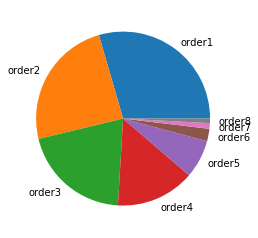

In [10]:
plt.pie(df4v1[['order1','order2','order3','order4','order5','order6','order7','order8']],labels=['order1','order2','order3','order4','order5','order6','order7','order8'])

([<matplotlib.patches.Wedge at 0x1f8465840b8>,
 [Text(0.8334673206082331, 0.7178664398606004, 'transaction1'),
  Text(-0.4996366274541336, 0.9799812449767901, 'transaction2'),
  Text(-1.0986017190251207, -0.05544603642326323, 'transaction3'),
  Text(-0.5675188862225183, -0.9422962982951554, 'transaction4'),
  Text(0.2824679219113567, -1.0631142333216501, 'transaction5'),
  Text(0.803837303728855, -0.750896523586256, 'transaction6'),
  Text(0.998172304111939, -0.46222510890675633, 'transaction7'),
  Text(1.0609472878089186, -0.2905010369876494, 'transaction8'),
  Text(1.0819241820829475, -0.19859522709306318, 'transaction9'),
  Text(1.0919540352534929, -0.1328020515414352, 'transaction10'),
  Text(1.0968547085254483, -0.08312489630402035, 'transaction11'),
  Text(1.0986017237702277, -0.05544594240415066, 'transaction12'),
  Text(1.0994965533148238, -0.033276557045813844, 'transaction13'),
  Text(1.0998741317724492, -0.016640139957382588, 'transaction14'),
  Text(1.0999860146910136, -0.0

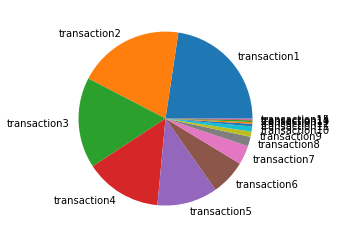

In [11]:
plt.pie(df4v1[['transaction1','transaction2','transaction3','transaction4','transaction5','transaction6','transaction7','transaction8','transaction9','transaction10','transaction11','transaction12','transaction13','transaction14','transaction15']],labels=['transaction1','transaction2','transaction3','transaction4','transaction5','transaction6','transaction7','transaction8','transaction9','transaction10','transaction11','transaction12','transaction13','transaction14','transaction15'])

([<matplotlib.patches.Wedge at 0x1f8465e6cc0>,
 [Text(0.15108895297380623, 1.089574287641407, 'paymentmethod1'),
  Text(-0.990438625611473, -0.47857217731169505, 'paymentmethod2'),
  Text(-0.0303098669122844, -1.0995823352381393, 'paymentmethod3'),
  Text(0.5587273847104345, -0.9475355980514073, 'paymentmethod4'),
  Text(0.8161056222901616, -0.7375443127476399, 'paymentmethod5'),
  Text(0.9423631687324909, -0.5674078411658223, 'paymentmethod6'),
  Text(1.0032492361053835, -0.4510997342650125, 'paymentmethod7'),
  Text(1.0301623372032775, -0.38570138579979313, 'paymentmethod8'),
  Text(1.0498454782679236, -0.3283663681932043, 'paymentmethod9'),
  Text(1.0663402730724574, -0.27003411270385325, 'paymentmethod10'),
  Text(1.0795966274664397, -0.21088177247711443, 'paymentmethod11'),
  Text(1.0895742823366679, -0.15108899122879638, 'paymentmethod12'),
  Text(1.0962429358727814, -0.09083735767306714, 'paymentmethod13'),
  Text(1.0992575229926782, -0.04040913441292337, 'paymentmethod14'),
  T

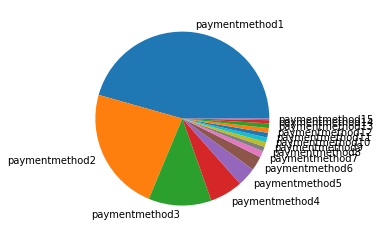

In [12]:
plt.pie(df4v1[['paymentmethod1','paymentmethod2','paymentmethod3','paymentmethod4','paymentmethod5','paymentmethod6','paymentmethod7','paymentmethod8','paymentmethod9','paymentmethod10','paymentmethod11','paymentmethod12','paymentmethod13','paymentmethod14','paymentmethod15']],labels=['paymentmethod1','paymentmethod2','paymentmethod3','paymentmethod4','paymentmethod5','paymentmethod6','paymentmethod7','paymentmethod8','paymentmethod9','paymentmethod10','paymentmethod11','paymentmethod12','paymentmethod13','paymentmethod14','paymentmethod15'])

In [40]:
df4['orderlength'] = 8 - df4.iloc[:,2:10].isna().sum(axis = 1)
df4['transactionlength'] = 15 - df4.iloc[:,10:25].isna().sum(axis = 1)
df4['paymentmethodlength'] = 15 - df4.iloc[:,25:40].isna().sum(axis = 1)

In [15]:
df5 = df4.groupby(['fraudulent']).orderlength.mean()
df5

fraudulent
False    2.495327
True     3.459016
Name: orderlength, dtype: float64

Text(0, 0.5, 'Mean number of orders')

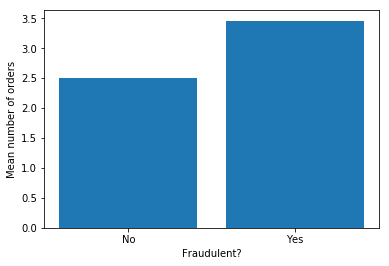

In [16]:
plt.bar(df5,height=df5,tick_label=['No','Yes'])
plt.xlabel("Fraudulent?")
plt.ylabel("Mean number of orders")

In [17]:
df6 = df4.groupby(['fraudulent']).transactionlength.mean()
df6

fraudulent
False    3.420561
True     4.213115
Name: transactionlength, dtype: float64

Text(0, 0.5, 'Mean number of transactions')

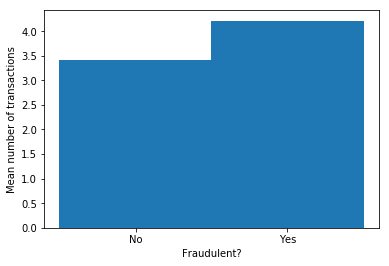

In [38]:
plt.bar(df6,height=df6,tick_label=['No','Yes'])
plt.xlabel("Fraudulent?")
plt.ylabel("Mean number of transactions")

In [19]:
df7 = df4.groupby(['fraudulent']).paymentmethodlength.mean()
df7

fraudulent
False    1.467290
True     3.032787
Name: paymentmethodlength, dtype: float64

Text(0, 0.5, 'Mean number of payment methods used')

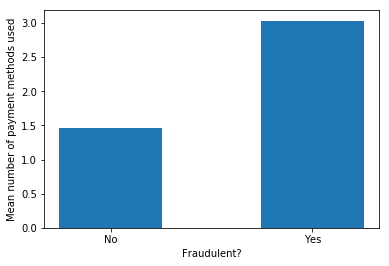

In [20]:
plt.bar(df7,height=df7,tick_label=['No','Yes'])
plt.xlabel("Fraudulent?")
plt.ylabel("Mean number of payment methods used")

Some deductions:
- Customer information is insignificant to commiting fraud.
- Fraudulent customers are more likely to make more orders and attempted transactions.
- Fraudulent customers are more likely to use twice more payment methods.

## After creating the 3 new pandas Series I also attempted Option A:
- Transform the json profiles into feature vectors.
- Construct a model to predict if a customer is fraudulent based on their profile.
- Report on the models success and show what features are most important.

As stated above customer information is not relevant to identifying whether they commited fraud, so it will not be used in the model.

In [53]:
df8 = df4[['fraudulent','orderlength','transactionlength','paymentmethodlength']]
df8 = df8.astype('float64')
df8.head()

,fraudulent,orderlength,transactionlength,paymentmethodlength
0,0.0,2.0,2.0,1.0
1,1.0,3.0,3.0,7.0
2,0.0,3.0,5.0,2.0
3,0.0,3.0,3.0,1.0
4,1.0,7.0,7.0,6.0


In [54]:
y = df8['fraudulent']
X = df8[['orderlength','transactionlength','paymentmethodlength']]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.69
Accuracy of Logistic regression classifier on test set: 0.83


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on test set: 0.83


In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(2)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.83


([<matplotlib.axis.XTick at 0x1f8461ff048>,
 <a list of 5 Text xticklabel objects>)

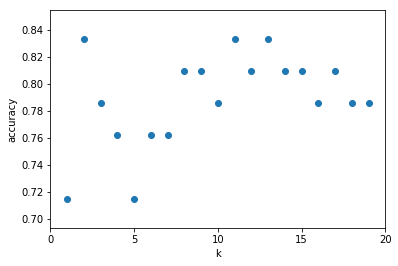

In [28]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.71
Accuracy of LDA classifier on test set: 0.76


In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.71
Accuracy of GNB classifier on test set: 0.83


In [31]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.68
Accuracy of SVM classifier on test set: 0.76


In [32]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.74
Accuracy of RF classifier on test set: 0.81


In [62]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(X_train, y_train)
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(NN.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(NN.score(X_test, y_test)))

Accuracy of NN classifier on training set: 0.60
Accuracy of NN classifier on test set: 0.74


Decision Trees seem to perform the best in both the training and test set. K-nearest neighbours also performs very well (with k=2)

Random Forest, Logistic Regression, Gaussian Naive Bayes also perform well.